In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
est = pd.read_excel('prospectscoringhw.xlsx', sheet_name='Estimation_data')
hold = pd.read_excel('prospectscoringhw.xlsx', sheet_name='Holdout_data')

### 1:

In [3]:
X = est.drop(['y'], axis=1)
Y = est[['y']]
model1 = sm.Logit(Y, sm.add_constant(X)).fit()
print(model1.summary())

Optimization terminated successfully.
         Current function value: 0.579248
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  200
Model:                          Logit   Df Residuals:                      191
Method:                           MLE   Df Model:                            8
Date:                Tue, 16 May 2023   Pseudo R-squ.:                  0.1135
Time:                        11:50:07   Log-Likelihood:                -115.85
converged:                       True   LL-Null:                       -130.68
Covariance Type:            nonrobust   LLR p-value:                 0.0002419
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -10.3659      2.477     -4.185      0.000     -15.220      -5.511
Gender     

### 2:

In [4]:
Xval = hold.drop(['y'], axis=1)
Yval = hold[['y']]
hold['y_pred'] = model1.predict(sm.add_constant(Xval))
hold['lift'] = hold['y_pred'] / est['y'].mean()
hold

,Gender,foodwebsites,travelwebsites,restaurantexp,travelexp,entertainmentexp,incm,ethnicdivneigh,y,y_pred,lift
0,0,158,57,70,63,0,13,0,1,0.525970,1.461026
1,1,187,57,70,63,0,0,29,0,0.554112,1.539201
2,1,313,57,45,63,0,0,0,0,0.320354,0.889874
3,1,310,57,70,63,0,0,14,1,0.723885,2.010792
4,0,37,48,70,63,0,0,0,1,0.268740,0.746499
...,...,...,...,...,...,...,...,...,...,...,...
295,1,141,57,55,63,0,13,0,0,0.251233,0.697870
296,0,232,48,50,26,0,26,14,0,0.073607,0.204465
297,0,302,57,70,63,0,0,14,1,0.723784,2.010512
298,0,84,42,70,63,0,0,0,0,0.272157,0.755993


### 3:

In [5]:
sorted_hold = hold.sort_values(by='lift', ascending=False)
sorted_hold.head(12)

,Gender,foodwebsites,travelwebsites,restaurantexp,travelexp,entertainmentexp,incm,ethnicdivneigh,y,y_pred,lift
131,1,317,57,70,63,12,26,0,1,0.750384,2.084399
243,0,321,57,70,63,0,28,0,0,0.743278,2.064661
191,0,315,57,70,63,0,0,14,1,0.739021,2.052836
159,0,311,57,70,63,0,0,0,1,0.736668,2.046299
19,1,314,57,70,63,0,0,0,1,0.730938,2.030384
290,0,303,57,70,63,0,0,15,0,0.724809,2.013359
3,1,310,57,70,63,0,0,14,1,0.723885,2.010792
297,0,302,57,70,63,0,0,14,1,0.723784,2.010512
200,1,308,57,70,63,0,13,0,1,0.721483,2.004119
42,0,297,57,70,63,0,0,0,1,0.720145,2.000402


In [6]:
sorted_hold.tail(12)

,Gender,foodwebsites,travelwebsites,restaurantexp,travelexp,entertainmentexp,incm,ethnicdivneigh,y,y_pred,lift
278,0,402,48,10,63,0,26,28,0,0.044820,0.124501
187,0,91,48,45,41,0,13,0,0,0.039644,0.110122
174,0,412,57,0,63,12,39,14,0,0.039307,0.109186
111,0,431,24,25,52,0,13,14,0,0.037558,0.104329
177,0,244,48,25,41,0,0,0,0,0.025110,0.069749
147,0,209,57,20,41,0,0,0,0,0.021408,0.059468
102,0,427,39,0,63,0,13,14,0,0.018351,0.050976
211,0,406,39,0,63,0,26,0,0,0.016224,0.045067
152,0,291,39,10,52,0,0,28,0,0.011335,0.031487
96,0,159,57,15,41,0,26,0,0,0.011060,0.030722


### 4:

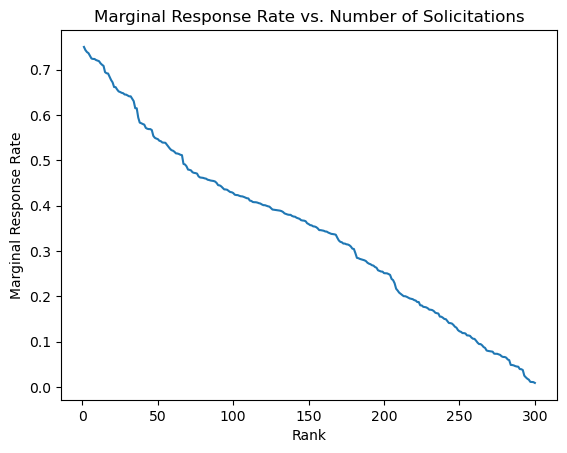

In [7]:
marginal_response_rate = sorted_hold['y_pred'].tolist()

plt.plot(range(1, len(marginal_response_rate)+1), marginal_response_rate)
plt.title("Marginal Response Rate vs. Number of Solicitations")
plt.xlabel('Rank')
plt.ylabel('Marginal Response Rate')
plt.show()

### 5:

In [8]:
equity = 30
solcost = 12
highest_pred_resp_rate = solcost / equity
highest_pred_resp_rate

0.4

In [9]:
(sorted_hold['y_pred'] > highest_pred_resp_rate).sum()

121

### 6:

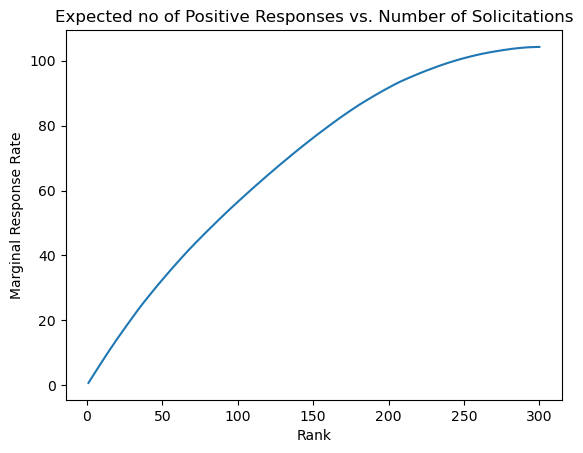

In [10]:
sorted_hold['cumu_sum'] = sorted_hold['y_pred'].cumsum()
cumu_sum = sorted_hold['cumu_sum'].tolist()

plt.plot(range(1, len(cumu_sum)+1), cumu_sum)
plt.title("Expected no of Positive Responses vs. Number of Solicitations")
plt.xlabel('Rank')
plt.ylabel('Marginal Response Rate')
plt.show()

### 7:

In [11]:
(sorted_hold['cumu_sum'] <= 40).sum()

64

### 8:

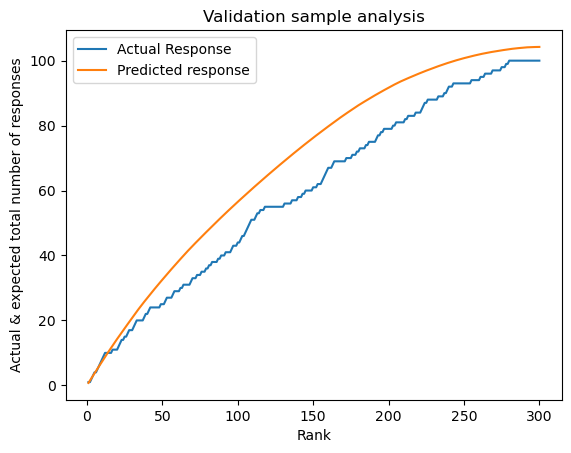

In [12]:
sorted_hold['y_cumu_sum'] = sorted_hold['y'].cumsum()
y_cumu_sum = sorted_hold['y_cumu_sum'].tolist()

plt.plot(range(1, len(y_cumu_sum)+1), y_cumu_sum, label = 'Actual Response')
plt.plot(range(1, len(cumu_sum)+1), cumu_sum, label = 'Predicted response')
plt.title("Validation sample analysis")
plt.xlabel('Rank')
plt.ylabel('Actual & expected total number of responses')
plt.legend()
plt.show()

In [13]:
sorted_hold

,Gender,foodwebsites,travelwebsites,restaurantexp,travelexp,entertainmentexp,incm,ethnicdivneigh,y,y_pred,lift,cumu_sum,y_cumu_sum
131,1,317,57,70,63,12,26,0,1,0.750384,2.084399,0.750384,1
243,0,321,57,70,63,0,28,0,0,0.743278,2.064661,1.493662,1
191,0,315,57,70,63,0,0,14,1,0.739021,2.052836,2.232683,2
159,0,311,57,70,63,0,0,0,1,0.736668,2.046299,2.969351,3
19,1,314,57,70,63,0,0,0,1,0.730938,2.030384,3.700289,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0,406,39,0,63,0,26,0,0,0.016224,0.045067,104.188246,100
152,0,291,39,10,52,0,0,28,0,0.011335,0.031487,104.199581,100
96,0,159,57,15,41,0,26,0,0,0.011060,0.030722,104.210641,100
285,1,354,30,10,52,0,0,0,0,0.010868,0.030188,104.221509,100
